In [ ]:
from __future__ import absolute_import, division, print_function
import numpy as np
import pandas as pd 
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import os
import matplotlib.image as mpimg

from sklearn.metrics import confusion_matrix, precision_score , recall_score, f1_score , accuracy_score
from mlxtend.plotting import plot_confusion_matrix

print("Impporting library is successful")

Impporting library is successful


In [ ]:
from google.colab import drive

drive.mount('/content/GDrive/')

print("Drive mounted  successfully")

Drive already mounted at /content/GDrive/; to attempt to forcibly remount, call drive.mount("/content/GDrive/", force_remount=True).
Drive mounted  successfully


In [ ]:
PATH = 'GDrive/My\ Drive/Tumor/cell_images/'

infected = os.listdir ("GDrive/My Drive/Tumor/cell_images/yes")
num_of_tumor= len(infected)


sporty = os.listdir ("GDrive/My Drive/Tumor/cell_images/no")
num_of_no_tumor = len(sporty)

print ("Total images for tumor cells ", num_of_tumor)
print ("Total images for no tumor cells ", num_of_no_tumor)

Total images for tumor cells  155
Total images for no tumor cells  98


In [ ]:
images = []
image_labels = []

for i in infected:
    print(i)
    try:
    
        reading_image = cv2.imread('GDrive/My Drive/Tumor/cell_images/yes/'+i)
        image_array = Image.fromarray(reading_image , 'RGB')

        image_resize = image_array.resize((64 , 64))
        rotate_image_60_degree = image_resize.rotate(60)
        rotate_image_75_degree = image_resize.rotate(75)
        blur = cv2.blur(np.array(image_resize) ,(10,10))

        images.append(np.array(image_resize))
        images.append(np.array(rotate_image_60_degree))
        images.append(np.array(rotate_image_75_degree))
        images.append(np.array(blur))

        image_labels.append(0)
        image_labels.append(0)
        image_labels.append(0)
        image_labels.append(0)

    except AttributeError:
        print('')

for s in sporty:
    print(s)

    try:
        
        reading_image = cv2.imread('GDrive/My Drive/Tumor/cell_images/no/'+s)
        image_array = Image.fromarray(reading_image , 'RGB')

        image_resize = image_array.resize((64 , 64))
        rotate_image_60_degree = image_resize.rotate(60)
        rotate_image_75_degree = image_resize.rotate(75)

        images.append(np.array(image_resize))
        images.append(np.array(rotate_image_60_degree))
        images.append(np.array(rotate_image_75_degree))

        image_labels.append(1)
        image_labels.append(1)
        image_labels.append(1)

        
    except AttributeError:
        print('')

Y73.jpg
Y96.jpg
Y31.jpg
Y8.jpg
Y2.jpg
Y24.jpg
Y92.jpg
Y153.jpg
Y71.JPG
Y169.jpg
Y247.JPG
Y91.jpg
Y35.jpg
Y256.JPG
Y69.jpg
Y76.jpg
Y102.jpg
Y10.jpg
Y65.JPG
Y157.JPG
Y99.JPG
Y32.jpg
Y14.jpg
Y17.jpg
Y38.jpg
Y158.JPG
Y100.JPG
Y86.JPG
Y26.jpg
Y98.JPG
Y249.JPG
Y61.jpg
Y25.jpg
Y33.jpg
Y159.JPG
Y49.JPG
Y255.JPG
Y11.jpg
Y23.JPG
Y51.jpg
Y40.JPG
Y257.jpg
Y85.JPG
Y107.jpg
Y56.jpg
Y1.jpg
Y20.jpg
Y60.jpg
Y62.jpg
Y95.jpg
Y195.JPG
Y46.jpg
Y92.png
Y21.jpg
Y79.jpg
Y78.jpg
Y242.JPG
Y97.JPG
Y22.jpg
Y18.JPG
Y248.JPG
Y187.jpg
Y82.jpg
Y147.JPG
Y182.JPG
Y19.JPG
Y44.JPG
Y112.JPG
Y259.JPG
Y30.jpg
Y166.JPG
Y52.jpg
Y120.JPG
Y15.jpg
Y116.JPG
Y170.JPG
Y106.jpg
Y9.jpg
Y161.JPG
Y192.JPG
Y258.JPG
Y253.JPG
Y75.JPG
Y111.JPG
Y90.jpg
Y160.JPG
Y37.jpg
Y162.jpg
Y59.JPG
Y27.jpg
Y42.jpg
Y39.jpg
Y53.jpg
Y12.jpg
Y67.JPG
Y185.jpg
Y45.JPG
Y58.JPG
Y186.jpg
Y89.JPG
Y77.jpg
Y181.jpg
Y188.jpg
Y167.JPG
Y50.JPG
Y254.jpg
Y74.jpg
Y13.jpg
Y29.jpg
Y47.JPG
Y252.jpg
Y6.jpg
Y81.jpg
Y117.JPG
Y34.jpg
Y36.JPG
Y165.JPG
Y114.JPG
Y54.jpg
Y146.JPG
Y

In [ ]:
image_cells = np.array(images)
image_labels = np.array(image_labels)

np.save('Image cells' , image_cells)

np.save('Image labels' , image_labels)

In [ ]:
print('Image cells : {} | Image labels: {}'.format(image_cells.shape , image_labels.shape))

Image cells : (914, 64, 64, 3) | Image labels: (914,)


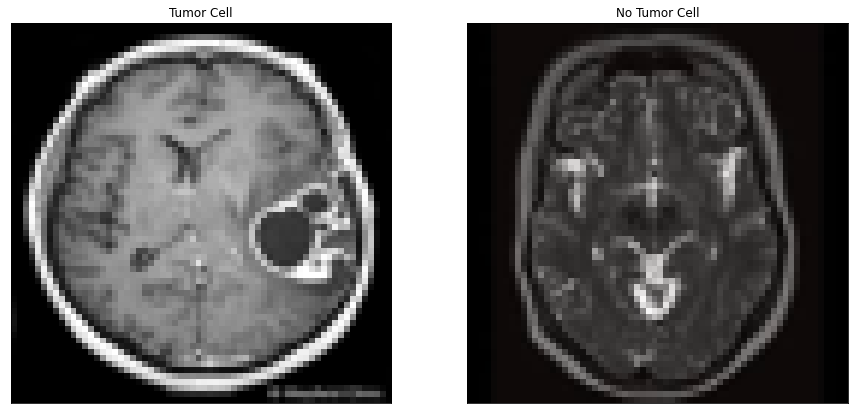

In [ ]:
plt.figure(1, figsize = (15 , 7))
plt.subplot(1 , 2 , 1)
plt.imshow(image_cells[0])
plt.title('Tumor Cell')
plt.xticks([]) , plt.yticks([])

plt.subplot(1 , 2 , 2)
plt.imshow(image_cells[650])
plt.title('No Tumor Cell')
plt.xticks([]) , plt.yticks([])

plt.show()

In [ ]:
n = np.arange(image_cells.shape[0])
np.random.shuffle(n)
image_cells = image_cells[n]
image_labels = image_labels[n]

In [ ]:
image_cells = image_cells.astype(np.float32)
image_labels = image_labels.astype(np.int32)
image_cells = image_cells/255

In [ ]:
from sklearn.model_selection import train_test_split

train_x , x , train_y , y = train_test_split(image_cells , image_labels , 
                                            test_size = 0.30 ,
                                            random_state = 111)

val_x , test_x , val_y , test_y = train_test_split(x , y , 
                                                    test_size = 0.5 , 
                                                    random_state = 111)

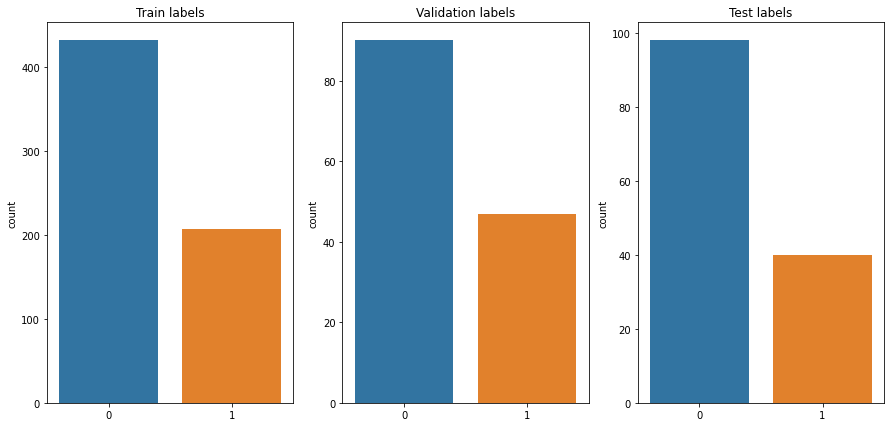

In [ ]:
plt.figure(1 , figsize = (15 ,7))
n = 0 
for z , j in zip([train_y , val_y , test_y] , ['Train labels','Validation labels','Test labels']):
    n += 1
    plt.subplot(1 , 3  , n)
    sns.countplot(x = z )
    plt.title(j)
plt.show()

In [ ]:
print('Train data shape {} ,Validation data shape {} , Test data shape {}'.format(train_x.shape,
                                                                           val_x.shape ,
                                                                           test_x.shape))

Train data shape (639, 64, 64, 3) ,Validation data shape (137, 64, 64, 3) , Test data shape (138, 64, 64, 3)


In [ ]:
from tensorflow.python.framework import ops

In [ ]:
ops.reset_default_graph()

def cnn_model_function(features , labels , mode):

    input_layers = tf.reshape(features['x'] , [-1 , 64 , 64 ,3])    

    convolution_1 = tf.layers.conv2d(
        inputs = input_layers , 
        filters = 30 , 
        kernel_size = [5 , 5],
        padding = 'same',
        activation = tf.nn.relu
        ) 
    
    
    convolution_2 = tf.layers.conv2d(
        inputs = convolution_1, 
        filters = 70,
        kernel_size = [3 , 3],
        padding = 'valid',
        activation = tf.nn.relu
        )

        
    convolution_3 = tf.layers.conv2d(
        inputs = convolution_2 ,
        filters = 15,
        kernel_size = [5 , 5],
        padding = 'same', 
        activation = tf.nn.relu
        )
    
    pool_1 = tf.layers.max_pooling2d(inputs = convolution_3 , pool_size = [2 , 2] , strides = 2 )
    
    convolution_4 = tf.layers.conv2d(
        inputs = pool_1 ,
        filters = 8,
        kernel_size = [3 , 3],
        padding = 'same', 
        activation = tf.nn.relu
        )

    pool_2 = tf.layers.max_pooling2d(inputs = convolution_4 , pool_size = [2 , 2] , strides = 2 , padding = 'same')
    
    pool_2_flatten = tf.layers.flatten(pool_2)

    density_1 = tf.layers.dense(
        inputs = pool_2_flatten,
        units = 2000,
        activation = tf.nn.relu
        )
    
    density_2 = tf.layers.dense(
        inputs = density_1,
        units = 1000,
        activation = tf.nn.relu
        )
    
    density_3 = tf.layers.dense(
        inputs = density_2 , 
        units = 500 ,
        activation = tf.nn.relu
        )
    
    logits = tf.layers.dense(
        inputs = density_3 ,
        units = 2
        )
    
    predictions = {
        'predict_classes': tf.argmax(input = logits , axis = 1),
        'probabilities': tf.nn.softmax(logits , name = 'softmax_tensor')
    }
    
    if mode == tf.estimator.ModeKeys.PREDICT:
        return tf.estimator.EstimatorSpec(mode = mode , 
                                          predictions = predictions)
    
    loss = tf.losses.sparse_softmax_cross_entropy(labels = labels , logits = logits)
  
    
    if mode == tf.estimator.ModeKeys.TRAIN:
        optimizer = tf.train.AdamOptimizer(learning_rate = 0.000001)
        train_optimizer = optimizer.minimize(loss = loss , 
                                      global_step = tf.train.get_global_step())
        
        return tf.estimator.EstimatorSpec(mode = mode , 
                                            loss = loss , 
                                            train_op = train_optimizer 
                                           )
    evaluation_metric_optimizer = {'accuracy' : tf.metrics.accuracy(labels = labels ,
                                         predictions =  predictions['predict_classes'])}
    
    return tf.estimator.EstimatorSpec(mode = mode , 
                                      loss = loss , 
                                      eval_metric_ops = evaluation_metric_optimizer)    

In [ ]:
tumor_cell_detector = tf.estimator.Estimator(model_fn = cnn_model_function , model_dir = '/tmp/modelchkptx')

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/modelchkptx', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [ ]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

In [ ]:
tensors_to_log = {'probabilities':'softmax_tensor'}
logging_hook = tf.train.LoggingTensorHook(
    tensors = tensors_to_log , every_n_iter = 100 
                 )

In [ ]:
train_input_function = tf.estimator.inputs.numpy_input_fn(
    x = {'x': train_x},
    y = train_y,
    batch_size = 128 , 
    num_epochs = None , 
    shuffle = True
    )

In [ ]:
#tumor_cell_detector.train(input_fn = train_input_function ,
#                            steps = 50,
#                           hooks = [logging_hook])

tumor_cell_detector.train(input_fn = train_input_function , steps = 4500)

INFO:tensorflow:Calling model_fn.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: `tf.layers.conv2d` is deprecated and will be removed in a future version. Please Use `tf.keras.layers.Conv2D` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/keras/legacy_tf_layers/convolutional.py:563: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  return layer.apply(inputs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: UserWarning: `tf.layers.conv2d` is deprecated and will be removed in a future version. Please Use `tf.keras.layers.Conv2D` instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: UserWarning: `tf.layers.conv2d` is deprecated and will be removed in a future version. Please Use `tf.keras.layers.Conv2D` instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: UserWarning: `tf.layers.max_pooling2d` is deprecated and will be removed in a fut

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...
INFO:tensorflow:Saving checkpoints for 0 into /tmp/modelchkptx/model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...
INFO:tensorflow:loss = 0.68270457, step = 0
INFO:tensorflow:global_step/sec: 7.32006
INFO:tensorflow:loss = 0.60902345, step = 100 (13.665 sec)
INFO:tensorflow:global_step/sec: 7.4307
INFO:tensorflow:loss = 0.63532686, step = 200 (13.460 sec)
INFO:tensorflow:global_step/sec: 7.36782
INFO:tensorflow:loss = 0.5412, step = 300 (13.571 sec)
INFO:tensorflow:global_step/sec: 7.43109
INFO:tensorflow:loss = 0.5107982, step = 400 (13.455 sec)
INFO:tensorflow:global_step/sec: 7.37086
INFO:tensorflow:loss = 0.61068565, step = 500 (13.570 sec)
INFO:tensorflow:global_step/sec: 7.

In [ ]:
evaluation_input_function = tf.estimator.inputs.numpy_input_fn(
    x = {'x': val_x},
    y = val_y , 
    num_epochs = 10 , 
    shuffle = False
    )
evaluation_results = tumor_cell_detector.evaluate(input_fn = evaluation_input_function)
print(evaluation_results)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: `tf.layers.conv2d` is deprecated and will be removed in a future version. Please Use `tf.keras.layers.Conv2D` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/keras/legacy_tf_layers/convolutional.py:563: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  return layer.apply(inputs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: UserWarning: `tf.layers.conv2d` is deprecated and will be removed in a future version. Please Use `tf.keras.layers.Conv2D` instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: UserWarning: `tf.layers.conv2d` is deprecated and will be removed in a future version. Please Use `tf.keras.layers.Conv2D` instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: UserWarning: `tf.layers.max_pooling2d` is deprecated and will be removed in a fut

INFO:tensorflow:Starting evaluation at 2021-12-13T04:33:36
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/modelchkptx/model.ckpt-4500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 0.75991s
INFO:tensorflow:Finished evaluation at 2021-12-13-04:33:37
INFO:tensorflow:Saving dict for global step 4500: accuracy = 0.8832117, global_step = 4500, loss = 0.26931465
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 4500: /tmp/modelchkptx/model.ckpt-4500
{'accuracy': 0.8832117, 'loss': 0.26931465, 'global_step': 4500}


In [ ]:
test_input_function = tf.estimator.inputs.numpy_input_fn(
    x = {'x': test_x},
    y = test_y , 
    num_epochs = 10 , 
    shuffle = False
    )
test_results = tumor_cell_detector.evaluate(input_fn = test_input_function)
print(test_results)

INFO:tensorflow:Calling model_fn.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: `tf.layers.conv2d` is deprecated and will be removed in a future version. Please Use `tf.keras.layers.Conv2D` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/keras/legacy_tf_layers/convolutional.py:563: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  return layer.apply(inputs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: UserWarning: `tf.layers.conv2d` is deprecated and will be removed in a future version. Please Use `tf.keras.layers.Conv2D` instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: UserWarning: `tf.layers.conv2d` is deprecated and will be removed in a future version. Please Use `tf.keras.layers.Conv2D` instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: UserWarning: `tf.layers.max_pooling2d` is deprecated and will be removed in a fut

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-12-13T04:33:37
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/modelchkptx/model.ckpt-4500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 0.74304s
INFO:tensorflow:Finished evaluation at 2021-12-13-04:33:38
INFO:tensorflow:Saving dict for global step 4500: accuracy = 0.9057971, global_step = 4500, loss = 0.23769613
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 4500: /tmp/modelchkptx/model.ckpt-4500
{'accuracy': 0.9057971, 'loss': 0.23769613, 'global_step': 4500}


In [ ]:
train_input_function = tf.estimator.inputs.numpy_input_fn(
    x = {'x': train_x},
    y = train_y , 
    num_epochs = 10 , 
    shuffle = False
    )
train_results = tumor_cell_detector.evaluate(input_fn = train_input_function)
print(test_results)

INFO:tensorflow:Calling model_fn.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: `tf.layers.conv2d` is deprecated and will be removed in a future version. Please Use `tf.keras.layers.Conv2D` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/keras/legacy_tf_layers/convolutional.py:563: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  return layer.apply(inputs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: UserWarning: `tf.layers.conv2d` is deprecated and will be removed in a future version. Please Use `tf.keras.layers.Conv2D` instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: UserWarning: `tf.layers.conv2d` is deprecated and will be removed in a future version. Please Use `tf.keras.layers.Conv2D` instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: UserWarning: `tf.layers.max_pooling2d` is deprecated and will be removed in a fut

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-12-13T04:33:38
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/modelchkptx/model.ckpt-4500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 2.40575s
INFO:tensorflow:Finished evaluation at 2021-12-13-04:33:41
INFO:tensorflow:Saving dict for global step 4500: accuracy = 0.97339594, global_step = 4500, loss = 0.13512155
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 4500: /tmp/modelchkptx/model.ckpt-4500
{'accuracy': 0.9057971, 'loss': 0.23769613, 'global_step': 4500}


In [ ]:
prediction_input_function = tf.estimator.inputs.numpy_input_fn(
    x = {'x' : test_x},
    y = test_y,
    num_epochs = 1,
    shuffle = False
    )

y_pred = tumor_cell_detector.predict(input_fn = prediction_input_function)
predict_classes = [p['predict_classes'] for p in y_pred]

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: `tf.layers.conv2d` is deprecated and will be removed in a future version. Please Use `tf.keras.layers.Conv2D` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/keras/legacy_tf_layers/convolutional.py:563: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  return layer.apply(inputs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: UserWarning: `tf.layers.conv2d` is deprecated and will be removed in a future version. Please Use `tf.keras.layers.Conv2D` instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: UserWarning: `tf.layers.conv2d` is deprecated and will be removed in a future version. Please Use `tf.keras.layers.Conv2D` instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: UserWarning: `tf.layers.max_pooling2d` is deprecated and will be removed in a fut

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/modelchkptx/model.ckpt-4500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [ ]:
print('Precision: {} \nRecall: {} \nF1 Score: {} \nAccuracy: {}'.format(precision_score(test_y , predict_classes) , 
                           recall_score(test_y , predict_classes) ,
                           f1_score(test_y , predict_classes) , 
                           accuracy_score(test_y , predict_classes)))

Precision: 0.9090909090909091 
Recall: 0.75 
F1 Score: 0.821917808219178 
Accuracy: 0.9057971014492754


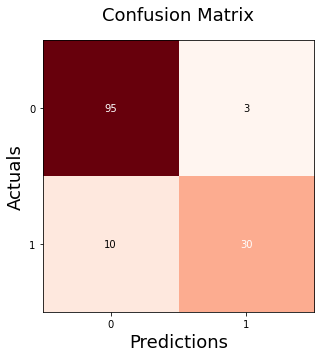

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
conf_matrix = confusion_matrix(test_y, predict_classes)
fig, ax = plot_confusion_matrix(conf_mat=conf_matrix, figsize=(5,5), cmap=plt.cm.Reds)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()